In [1]:
%load_ext autoreload
%autoreload 2

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
import sys
sys.path.append("../../")
from src.util import operators
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_nonlinear as compute_exp_val_nonlinear
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val_linear
from src.util import bath_correlation_function
from src.util import debye_spectral_density  
from src.homps import homps
from src.util import operators

In [106]:
# Parameters for the spin-boson model
epsilon = 2.0
delta = -2.0
# Parameters for the Debye spectral density
beta = 50.0
T = 1/beta
gamma = 5.0
eta = 0.5
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
L = sigma_z
h = operators.generate_spin_boson_hamiltonian(delta=delta, epsilon=epsilon)
# time window
duration = 30

# Convergence of the BCF

In [78]:
N_steps = 1000
taus = np.linspace(0, duration, N_steps)
N_terms = [13, 20, 50, 100, 1000]
alphas = np.empty((len(N_terms), N_steps), dtype=complex)
for i, N in enumerate(N_terms):
    g, w = debye_spectral_density.get_debye_coefficients(N, T, gamma, eta)
    alphas[i, :] = bath_correlation_function.alpha(taus, g, w)

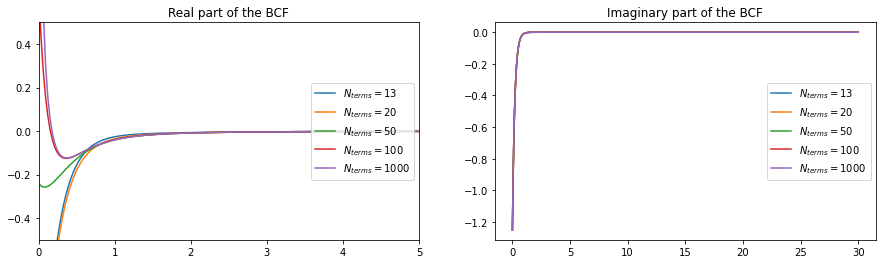

In [79]:
figure, axarray = plt.subplots(1, 2, figsize=(15, 4))
for i, N in enumerate(N_terms):
    axarray[0].plot(taus, np.real(alphas[i, :]), label="$N_{terms} = "+str(N)+"$")
    axarray[1].plot(taus, np.imag(alphas[i, :]), label="$N_{terms} = "+str(N)+"$")
axarray[0].legend(loc="right")
axarray[0].set_title("Real part of the BCF")
axarray[0].set_xlim(0, 5)
axarray[0].set_ylim(-0.5, 0.5)
axarray[1].legend(loc="right")
axarray[1].set_title("Imaginary part of the BCF")
plt.show()

# HOMPS

In [97]:
N_terms = 13

In [98]:
g, w = debye_spectral_density.get_debye_coefficients(N_terms, T, gamma, eta)

In [99]:
N_steps = 1000
N_trunc = 9

In [100]:
chimax = 10
eps = 1.e-3
N_krylov = 10

In [63]:
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov)
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov)
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

Without noise:
detected keyboard interrupt.


AttributeError: 'NoneType' object has no attribute 'shape'

Without noise:
took 23.120444297790527 seconds.


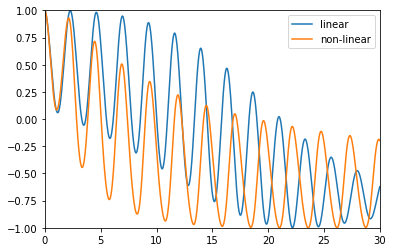

In [93]:
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

Without noise:
took 22.892771005630493 seconds.


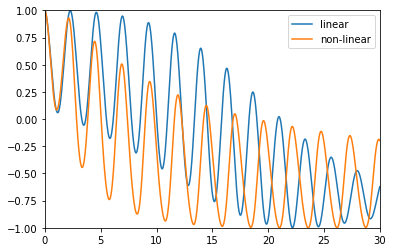

With noise (non-Linear):


No handles with labels found to put in legend.


took 37.19580435752869 seconds.


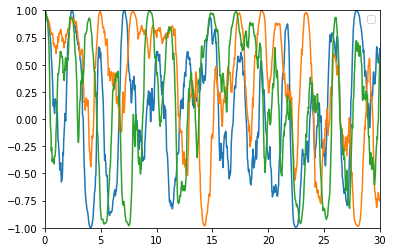

In [94]:
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

start = time.time()
print("With noise (non-Linear):")
for _ in range(3):
    hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=True, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
    psis = hierarchy.compute_realizations(1)
    sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
    plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

Without noise:
took 21.955727338790894 seconds.


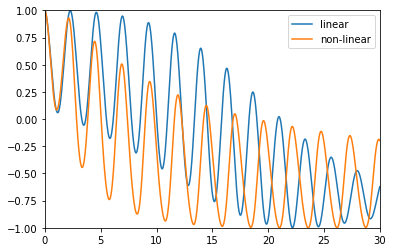

With noise (non-Linear):


No handles with labels found to put in legend.


took 33.25490713119507 seconds.


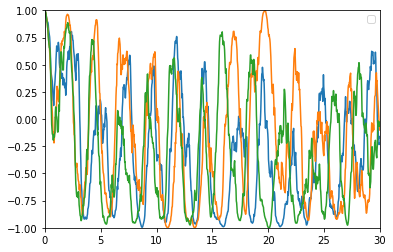

In [95]:
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

noise_g, noise_w = debye_spectral_density.get_debye_coefficients(1000, T, gamma, eta)

start = time.time()
print("With noise (non-Linear):")
for _ in range(3):
    hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=True, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4', noise_g=noise_g, noise_w=noise_w)
    psis = hierarchy.compute_realizations(1)
    sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
    plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

Without noise:
took 78.83967924118042 seconds.


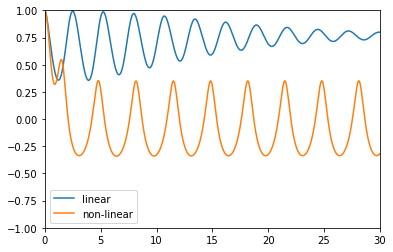

In [64]:
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

Without noise:
took 189.32523345947266 seconds.


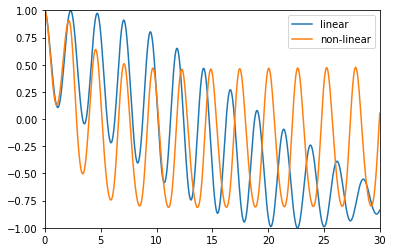

In [32]:
N_terms_prime = 30
g_prime, w_prime = debye_spectral_density.get_debye_coefficients(N_terms_prime, T, gamma, eta)
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

Without noise:
took 385.0743911266327 seconds.


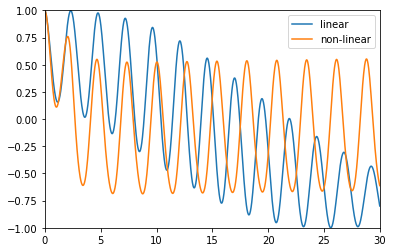

In [33]:
N_terms_prime = 40
g_prime, w_prime = debye_spectral_density.get_debye_coefficients(N_terms_prime, T, gamma, eta)
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

Without noise:
took 892.4000430107117 seconds.


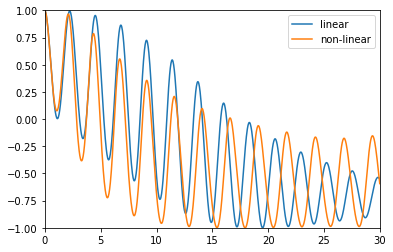

In [34]:
N_terms_prime = 50
g_prime, w_prime = debye_spectral_density.get_debye_coefficients(N_terms_prime, T, gamma, eta)
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

Without noise:
took 1003.1337020397186 seconds.


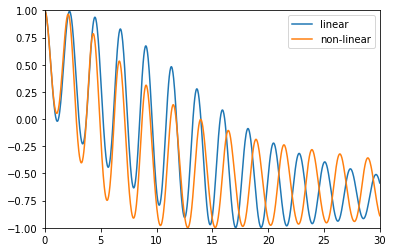

In [35]:
N_terms_prime = 60
g_prime, w_prime = debye_spectral_density.get_debye_coefficients(N_terms_prime, T, gamma, eta)
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

Without noise:
took 1091.4911189079285 seconds.


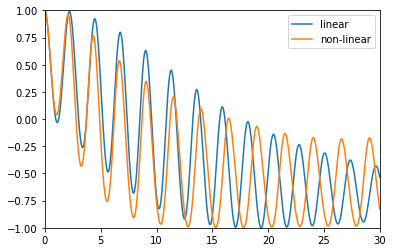

In [36]:
N_terms_prime = 70
g_prime, w_prime = debye_spectral_density.get_debye_coefficients(N_terms_prime, T, gamma, eta)
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

Without noise:
detected keyboard interrupt.


AttributeError: 'NoneType' object has no attribute 'shape'

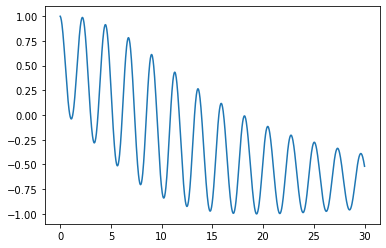

In [37]:
N_terms_prime = 80
g_prime, w_prime = debye_spectral_density.get_debye_coefficients(N_terms_prime, T, gamma, eta)
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

In [ ]:
N_terms_prime = 90
g_prime, w_prime = debye_spectral_density.get_debye_coefficients(N_terms_prime, T, gamma, eta)
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

In [ ]:
N_terms_prime = 100
g_prime, w_prime = debye_spectral_density.get_debye_coefficients(N_terms_prime, T, gamma, eta)
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g_prime, w_prime, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

# Full run

In [96]:
noise_g, noise_w = debye_spectral_density.get_debye_coefficients(1000, T, gamma, eta)

In [101]:
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=True, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4', noise_g=noise_g, noise_w=noise_w)

In [102]:
psis_100 = hierarchy.compute_realizations(N_samples=100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

Now takes ~12 seconds per realization

Takes ~5:00 minutes per realization for chi_max = 10,
and ~2:20 minutes per realization for chi_max = 3 (TDVP)

Takes ~5 minutes per realization for chi_max = 10 (RK4)

In [103]:
sigma_zs_100 = compute_exp_val_nonlinear(psis_100, sigma_z)

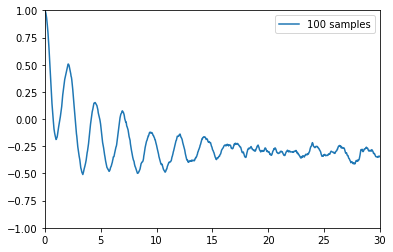

In [104]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_100, label="100 samples")
plt.legend()
plt.ylim(-1., 1)
plt.xlim(0, duration)
plt.show()

# Performance analysis

# Different BCF expansion terms??

In [40]:
def compute_BCF_expansion_alternative(N_terms, T, gamma, eta):
    gs = np.empty(N_terms, dtype=complex)
    ws = np.empty(N_terms, dtype=complex)
    
    gs[0] = eta * gamma / 2 * (1.j - np.tan(gamma / 4 / T))
    ws[0] = gamma
    
    for n in range(1, N_terms):
        gs[n] = - 8*eta*gamma*np.pi*(2*n-1) / ((gamma/T)**2 - (2*(2*n-1)*np.pi)**2)
        ws[n] = 2*(2*n-1)*np.pi*T
    return gs, ws

In [43]:
g, w = compute_BCF_expansion_alternative(13, T, gamma, eta)

Without noise:
took 70.16465377807617 seconds.


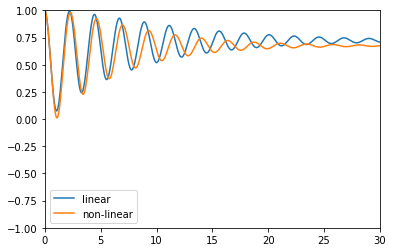

In [44]:
start = time.time()
print("Without noise:")
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="linear")

hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="non-linear")
end = time.time()
print("took", end-start, "seconds.")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.legend()
plt.show()

In [45]:
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=True, chimax=chimax, epsilon=eps, N_krylov=N_krylov, method='RK4')

In [46]:
psis_100 = hierarchy.compute_realizations(N_samples=100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

In [49]:
sigma_zs_100 = compute_exp_val_nonlinear(psis_100, sigma_z)

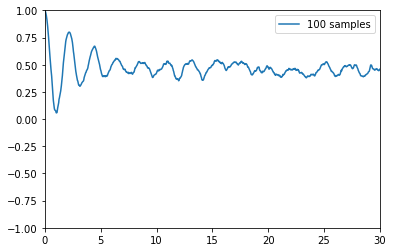

In [50]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_100, label="100 samples")
plt.legend()
plt.ylim(-1., 1)
plt.xlim(0, duration)
plt.show()